In [1638]:
# Use of IPython.display and HTML for using css to format text in Markdown based on
# www.dataquest.io/blog/advanced-jupyter-notebooks-tutorial
from IPython.display import HTML
HTML(
    "<style>\
    span.str {color:#BA2121; font-style:italic; font-weight:bold;}\
    span.num {color:#080; font-style:italic; font-weight:bold;}\
    span.bltn {color:#080; font-weight:bold;}\
    span.op {color:#AA22FF;}\
    span.func {color:#00F;}\
    h3.yt {color:#009900; font-style:italic;}\
    span.yt {color:#009900; font-style:italic;}</style>"
)

<h2><b><u>Case Study: Weather Stations</u></b></h2>

<h3><b><i>Background</i></b></h3>
The National Oceanic and Atmospheric Administration (NOAA) maintains local climatological data (LCD) for various locations within the United States. LCD data is collected at approximately 950 Automated Surface Observing Systems (ASOS) in hourly, daily, and monthly measurements [1]. In this Case Study you will use the LCD data for Drake Field which is located in Fayetteville for the first part. For the <span class = "yt">Your Turn </span> portion, you will use the Sheffield Weather Station data from DataCamp. 


<h3><b><i>Goal</i></b></h3>
The goal of this Case Study is to practice statistical analysis of Drake Field LCD data. You will practice concepts covered in DASC 2113 lecture along with DataCamp's <a href = "https://app.datacamp.com/learn/courses/statistical-thinking-in-python-part-1">Statistical Thinking in Python (Part 1)</a> and <a href = "https://app.datacamp.com/learn/courses/statistical-thinking-in-python-part-2">Statistical Thinking in Python (Part 2)</a>. 

<h3><b>Data</b></h3>
The Drake Field LCD (DFLCD) data you will use in this Case Study is a subset of the DFLCD data downloaded from NOAA for the time range of 10/16/2012 - 10/16/2021. The attribute of interest in the DFLCD data is <i>Daily Precipitation</i>. More information about other LCD attributes can be found at [2]. 

The Sheffield Weather Station data contains monthly rainfall and temperature estimates. It is hosted on DataCamp's Statistical Thinking in Python (Part 2) homepage [3]. 

Sources: 
<ol style = "font-size:8px">
    <li>NOAA. 2021. "Local Climatological Data (LCD)". https://www.ncei.noaa.gov/products/land-based-station/local-climatological-data. </li>
    <li>NOAA. 2021. "Local Climatological Data (LCD) Dataset Documentation" https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/LCD_documentation.pdf</li>
    <li>DataCamp. 2021."Sheffield Weather Data". Statistical Thinking in Python (Part 2).  https://app.datacamp.com/learn/courses/statistical-thinking-in-python-part-2</li>

</ol>

<h4><u>Importing Libraries and Loading the Data</u></h4>


In [1639]:
# Import 
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import random 
from scipy.stats import poisson, expon
import math

<h4><u>Loading the Data</u></h4>

The Drake Field data (DFLCD) will be used for the worthrough of this Case Study. Let's open the <i>DFLCD</i> csv data as a DataFrame. A warning will appear saying that some columns have <b><i>mixed types</i></b>. This warning occurs because the column values have a mixture of values that could be considered <span class="num">float</span> by Pandas and values that could be considered <span class="str">string/object</span> by Pandas in the same column. We'll ignore this warning for now, but will fix the values in this Case Study's column of interest <i>DailyPrecipitation</i> later. 

In [1640]:
# Open csv and read into DataFrame. 
all_weather = pd.read_csv("Data/2750818.csv")
all_weather.head()

C:\Users\jmbreche\AppData\Local\Temp\ipykernel_19916\2239495703.py:2: DtypeWarning: Columns (4,10,11,12,14,18,26,33,39) have mixed types. Specify dtype option on import or set low_memory=False.
  all_weather = pd.read_csv("Data/2750818.csv")


,STATION,DATE,REPORT_TYPE,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,DailyAverageStationPressure,DailyAverageWetBulbTemperature,DailyAverageWindSpeed,...,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed
0,72344593993,2012-10-16T00:53:00,FM-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,60.0,29.91,NaN,28.61,10,54.0,210,NaN,6.0
1,72344593993,2012-10-16T01:53:00,FM-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,62.0,29.89,NaN,28.59,10,53.0,210,NaN,3.0
2,72344593993,2012-10-16T02:53:00,FM-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,62.0,29.88,NaN,28.57,10,52.0,200,NaN,5.0
3,72344593993,2012-10-16T03:53:00,FM-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,72.0,29.87,NaN,28.56,10,50.0,190,NaN,7.0
4,72344593993,2012-10-16T04:53:00,FM-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,77.0,29.88,NaN,28.56,10,49.0,190,NaN,5.0


<h4><u>Checking DataFrame Info</u></h4>

To get a better idea on the warning above and the type of data stored in <b><i>all_weather</i></b> let's run the <b><i>info</i></b> method. 

In [1641]:
# Get information about all_weather DataFrame
all_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107195 entries, 0 to 107194
Data columns (total 41 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   STATION                                     107195 non-null  int64  
 1   DATE                                        107195 non-null  object 
 2   REPORT_TYPE                                 107195 non-null  object 
 3   DailyAverageDewPointTemperature             3176 non-null    float64
 4   DailyAverageDryBulbTemperature              3285 non-null    object 
 5   DailyAverageRelativeHumidity                3179 non-null    float64
 6   DailyAverageSeaLevelPressure                3175 non-null    float64
 7   DailyAverageStationPressure                 3282 non-null    float64
 8   DailyAverageWetBulbTemperature              3176 non-null    float64
 9   DailyAverageWindSpeed                       3284 non-null    float64
 

<h4><u>Extracting Daily Summaries</u></h4>

As shown by the <b><i>info</i></b> method above, the <b><i>all_weather</i></b> DataFrame contains hourly, daily, and monthly records. This Case Study focuses on the <b><i>daily</i></b> time period which is represented as <i>SOD</i> in the <i>REPORT_TYPE</i> column. Some values in the <i>REPORT_TYPE</i> column have unnecessary whitespace that must be remove to correctly extract the rows. This can be done by selecting the <i>REPORT_TYPE</i> column, accessing its values as strings and stripping the whitespace using <b><i>strip</i></b>. 

In [1642]:
# Strip off whitespace from REPORT_TYPE column 
all_weather.iloc[:,2] = all_weather.iloc[:,2].str.strip()

# Display first 5 rows 
all_weather.head()

,STATION,DATE,REPORT_TYPE,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,DailyAverageStationPressure,DailyAverageWetBulbTemperature,DailyAverageWindSpeed,...,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed
0,72344593993,2012-10-16T00:53:00,FM-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,60.0,29.91,NaN,28.61,10,54.0,210,NaN,6.0
1,72344593993,2012-10-16T01:53:00,FM-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,62.0,29.89,NaN,28.59,10,53.0,210,NaN,3.0
2,72344593993,2012-10-16T02:53:00,FM-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,62.0,29.88,NaN,28.57,10,52.0,200,NaN,5.0
3,72344593993,2012-10-16T03:53:00,FM-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,72.0,29.87,NaN,28.56,10,50.0,190,NaN,7.0
4,72344593993,2012-10-16T04:53:00,FM-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,77.0,29.88,NaN,28.56,10,49.0,190,NaN,5.0


Now that the whitespace has been removed, the rows corresponding to daily summaries can be extracted by selecting rows where <i>REPORT_TYPE</i> is equal to <span class="str">SOD</span>. At this point, columns that correspond to only the daily values are also selected. 

In [1643]:
# Extract rows in which REPORT_TYPE is SOD for daily
daily= all_weather[all_weather["REPORT_TYPE"] == "SOD"]

# Only keep columns corresponding to daily values
# Specify column indices to keep 
col_idx = np.arange(0, 5)
col_idx = np.append(col_idx, np.arange(11,23))

# Extract those columns 
daily = daily.iloc[:, col_idx]

# Display first 5 rows 
daily.head()


,STATION,DATE,REPORT_TYPE,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyDepartureFromNormalAverageTemperature,DailyHeatingDegreeDays,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,DailyWeather
24,72344593993,2012-10-16T23:59:00,SOD,44.0,65.0,7.3,0.0,77.0,52.0,180.0,35.0,0,0,0,190.0,25.0,NaN
60,72344593993,2012-10-17T23:59:00,SOD,55.0,57.0,-0.4,8.0,71.0,43.0,190.0,29.0,0.18,0,0,190.0,22.0,TS RA BR
86,72344593993,2012-10-18T23:59:00,SOD,30.0,52.0,-5.2,13.0,64.0,39.0,250.0,35.0,0,0,0,260.0,25.0,HZ
115,72344593993,2012-10-19T23:59:00,SOD,34.0,51.0,-5.9,14.0,62.0,39.0,300.0,33.0,0,0,0,300.0,21.0,HZ
140,72344593993,2012-10-20T23:59:00,SOD,42.0,56.0,-0.6,9.0,77.0,35.0,210.0,22.0,0,0,0,170.0,13.0,NaN


<h4><u>Pre-processing Daily Precipitation Data</u></h4>

Now that the daily rows have been extracted into their own DataFrame, the next step is to remove any daily precipitation values that are not valid. 

In [1644]:
# Drop any days that do not have a DailyPrecipitation reading 
daily.dropna(subset = ["DailyPrecipitation"], inplace = True)

Now that <b><i>na</i></b> values are removed, the next step is to decide what to conver the value of <i>T</i> to. This is what the warning was about when the csv file was first loaded. The <i>DailyPrecipitation</i> column contains both numerical values and characters. T means that a trace amount of precipitation occured [2]. For this Case Study, we will treat all precipitation with the value of T as 0. 

There is also one row in which <i>DailyPrecipitation</i> contains the value of 0.00s. This will be set to 0. 

In [1645]:
daily.loc[daily["DailyPrecipitation"] == "T", "DailyPrecipitation"] = "0"
print(daily.shape)

# Remove the row with 0.00s. Can't find what this should represent in the documentation. 
daily = daily[daily["DailyPrecipitation"] != "0.00s"]
print(daily.shape)

(3285, 17)
(3284, 17)


The <i>DailyPrecipitation</i> column consists of all numerical values now. Let's convert the <i>DailyPrecipitation</i> column's data type to <span class="num">float</span> to represent this. 

In [1646]:
# Convert DailyPrecipitation to float 
daily[["DailyPrecipitation"]] = daily[["DailyPrecipitation"]].astype("float")

Let's adjust the date in the <i>DATE</i> column to only include the year, month, and date. 

In [1647]:
# Get dates as series 
dates = daily["DATE"].values

# Remove time portion. If this is run more than once it will generate an error. 
dates = [x[:x.find("T")] for x in dates if x.find("T") != -1]

daily["DATE"] = dates

In [1648]:
daily.head()

,STATION,DATE,REPORT_TYPE,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyDepartureFromNormalAverageTemperature,DailyHeatingDegreeDays,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,DailyWeather
24,72344593993,2012-10-16,SOD,44.0,65.0,7.3,0.0,77.0,52.0,180.0,35.0,0.00,0,0,190.0,25.0,NaN
60,72344593993,2012-10-17,SOD,55.0,57.0,-0.4,8.0,71.0,43.0,190.0,29.0,0.18,0,0,190.0,22.0,TS RA BR
86,72344593993,2012-10-18,SOD,30.0,52.0,-5.2,13.0,64.0,39.0,250.0,35.0,0.00,0,0,260.0,25.0,HZ
115,72344593993,2012-10-19,SOD,34.0,51.0,-5.9,14.0,62.0,39.0,300.0,33.0,0.00,0,0,300.0,21.0,HZ
140,72344593993,2012-10-20,SOD,42.0,56.0,-0.6,9.0,77.0,35.0,210.0,22.0,0.00,0,0,170.0,13.0,NaN


Finally, let's make sure that the <i>DATE</i> column is stored as a datetime type. 

In [1649]:
daily["DATE"] = pd.to_datetime(daily["DATE"], format = "%Y-%m-%d", errors = "coerce")


<h4><u>Extracting Weather Data for May</u></h4>

In this Case Study, we will focus on precpitation events for the month of May. A precipitation event will be considered any non-zero <i>DailyPrecpitation</i> value. Let's extract the rows that correspond to May into a new DataFrame called <b><i>may</i></b>. 

In [1650]:
# Extract May 
may = daily[daily["DATE"].dt.month == 5].reset_index()

# Look at the number of years on record 
daily["DATE"].dt.year.value_counts()

2016    366
2020    366
2013    365
2014    365
2015    365
2017    365
2018    365
2019    364
2021    286
2012     77
Name: DATE, dtype: int64

<h4><u>Daily Precipitation Events</u></h4>

A day is considered to have a precpitation event occur on it if there if there is a value greater than 0 in <i>DailyPrecipitation</i>. Below is the number of day's in <b><i>may</i></b> that do and do not have a precipitation event occuring. 

In [1651]:
# Number of days with no precipitation event occuring 
print(may[may["DailyPrecipitation"] == 0].shape)

# Number of days with a precipitation event occuring 
print(may[may["DailyPrecipitation"] > 0].shape)


(148, 18)
(131, 18)


Since we're interested in days in which precipitation occured in May, let's create a new DataFrame called <b><i>years_df</i></b> that calculates the number of daily rainfall events that occured in May for each year. 

In [1652]:
# There's probably a better way to do this Code Cell but this gets the result
# Calculate the number of days with rain events in May 
# Get the unique years 
years_df = pd.DataFrame(may["DATE"].dt.year.value_counts())
years = years_df.index.tolist()

precip_data = []

for year in years:
    precip = may[may["DATE"].dt.year == year]["DailyPrecipitation"]
    precip_occur = [x for x in precip if x > 0]
    precip_data.append([year, len(precip_occur)])

may_precip_data = pd.DataFrame(precip_data, columns = ["Year", "Days Precip"])
may_precip_data.head()

,Year,Days Precip
0,2013,10
1,2014,13
2,2015,22
3,2016,16
4,2017,11


Now let's visualize the results of <b><i>years_df</i></b> as a barplot using Seaborn. 

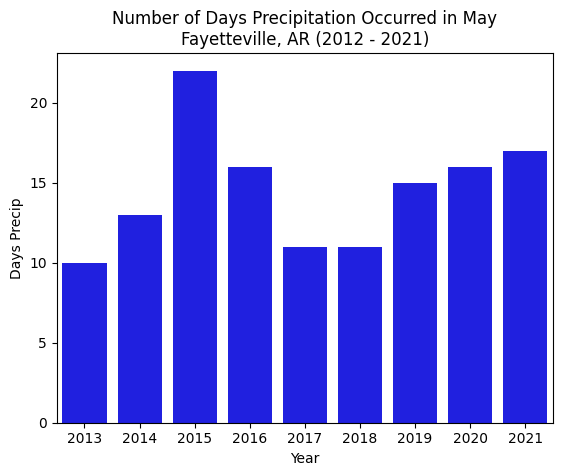

In [1653]:
# Create bar plot showing the counts for the number of days in which rainfall occured 
days_precip_plot = sns.barplot(x = "Year", y = "Days Precip", data = may_precip_data, color = "blue")

days_precip_plot.axes.set_title("Number of Days Precipitation Occurred in May\nFayetteville, AR (2012 - 2021)")

plt.show()

<h4><u>Daily Precipitation as a Poisson Process</u></h4>

The number of days that precipitation occurs can be modeled by the Poisson Distribution <a href = "http://web.mit.edu/1.017/www/lecnotes_03/extras/Poisson/Poisson00.html">(MIT, 2000)</a>. The number of days in May that a precipitation event has occured on is what's been calculated in <b><i>may_precip_data</i></b>.

In order to model the number of days in May a precipitation event occurs with the Poisson distribution we need to calculate the parameter lambda. Lambda is the average number of days that a precipitation event has occured in may. However, lambda is a keyword in python, so this terminology can't be used as a variable name. Instead we'll call the parameter lambda <b><i>mu</i></b>. 
Calculate the average number of days (lambda) that precipitation occurred in May. 

<p style = "font-size:8px">Sources for Poisson Section </p>
<ol style = "font-size:8px">
    <li>NIST/SEMATECH. "Poisson Distribution". Engineering Statistics Handbook. https://www.itl.nist.gov/div898/handbook/eda/section3/eda366j.htm</li>
    <li>MIT. "Poisson Random Variables --Synthetic Rainfall Series". http://web.mit.edu/1.017/www/lecnotes_03/extras/Poisson/Poisson00.html</li>

</ol>

In [1654]:
# Take the average number of days rain occured in May (lambda) as mu
mu = may_precip_data["Days Precip"].mean()

print(mu)

14.555555555555555


<h4><u>Graphing the Poisson PMF and CDF </u></h4>

Now that we have a value for the Poisson distribution's parameter, let's plot the pdf for a Poisson random variable for our calculated value of mu with a generated set of data representing theoretical values of 0 to 31 days. We can also plot the pmf of the observed data in <b><i>may_precip_data</i></b>. 

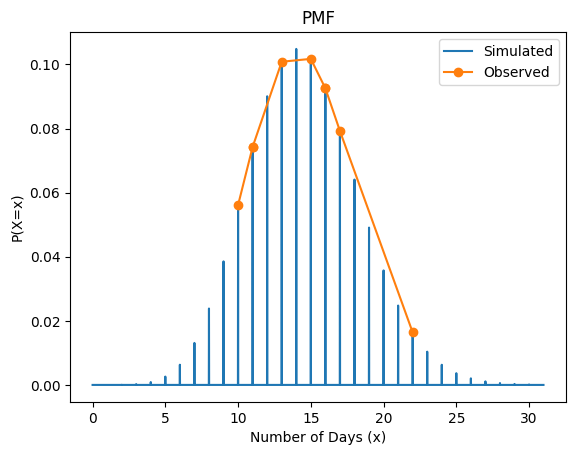

In [1655]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html
# Plot PMF. Use Scipy's poisson instead of numpy 

# Create the range of days [0, 31]
x_days = np.arange(0, 31, .01)
y_days = poisson.pmf(x_days, mu = mu)
plt.plot(x_days, y_days)

# Sort may_rain_data by "Days Rained"
may_precip_data = may_precip_data.sort_values(by = ["Days Precip"])

# Plot the PMF using observed values 
plt.plot(may_precip_data["Days Precip"], poisson.pmf(may_precip_data["Days Precip"], mu = mu), "o", linestyle = "-")
plt.title("PMF")
plt.xlabel("Number of Days (x)")
plt.ylabel("P(X=x)")
plt.legend(labels = ["Simulated", "Observed"])
plt.show()


The observed precipitation event data in <b><i>may_precip_data</i></b> PMF closely resembles the generated precipitation data's PMF. However, the observed data does not have events occuring in the left or right tails of the generated PMF. 

Next let's compute the ECDF of the observed <b><i>may_precip_data</i></b> and generated data. You can use the ecdf function from DataCamp or write one of your own to compute the ecdf. 

In [1656]:
# Function source: https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/graphical-exploratory-data-analysis?ex=12
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, (n + 1)) / n

    return x, y


Let's generate 10,000 samples from a Poisson distribution with lambda equal to the sample average mu. 

In [1657]:
# Sample poisson distribution 
poisson_samples = np.random.poisson(lam = mu, size = 10000)

The ecdf can now be calculated from the generated <b><i>poisson_samples</i></b> and the observed <b><i>may_precip_data</i></b>. 

In [1658]:
x_sample, y_sample = ecdf(poisson_samples)
x_observed, y_observed = ecdf(may_precip_data["Days Precip"])

Finally, the ECDF's can be plotted. 

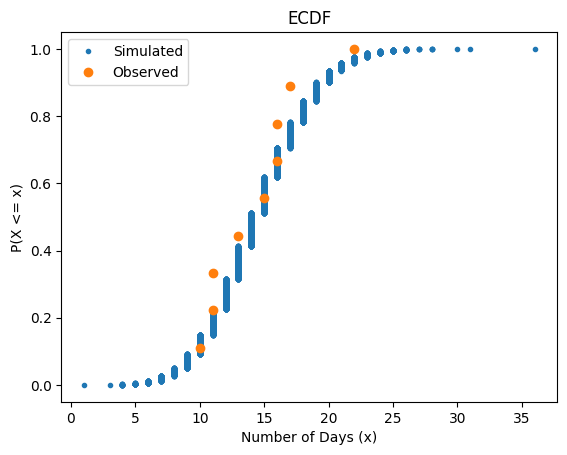

In [1659]:
# ECDF 
plt.plot(x_sample, y_sample, marker='.', linestyle='none')
plt.plot(x_observed, y_observed, marker = "o", linestyle = "none")
plt.title("ECDF")
plt.xlabel("Number of Days (x)")
plt.ylabel("P(X <= x)")
plt.legend(labels=["Simulated", "Observed"])
plt.show()

<h4><u>Using the Poisson Distribution</u></h4>

Let's see how we can use the Poisson distributoin to answer questions. We'll see two ways to do this. The first is by using the method in DataCamp of taking the sum of samples and dividing by the total number of samples. The second is using the <b><i>poisson.cdf</i></b> and <b><i>poisson.pmf</i></b> functions from scipy.stats.

<b><i>Question: </i></b> What is the probability of 15 or less days of precipitation in May? 

In [1660]:
# P(X <= 15)
n_less_15 = np.sum(x_sample <= 15)

# Divide by total number of samples 
print(n_less_15/len(x_sample))

# Calculate it from the distribution 
print(poisson.cdf(15, mu = mu))

0.6184
0.6135154018168186


<b><i>Question:</i></b> What is the probability that there will be exactly 20 days in May in which a precipitation event occurs?

In [1661]:
# P(X == 20)
n_equal_20 = np.sum(x_sample == 20)
print(n_equal_20/len(x_sample))

print(poisson.pmf(20, mu = mu))


0.0353
0.03573169749889015


Both the calculated value from the 10,000 generated samples and the value generated by the theoretical distribution are very similar. 

<h4>Time between Precipitation Events and the Exponential Distribution </h4>

The time between two precipitation events occuring can be modeled by the exponential distribution. The exponential distribution needs either the average time between two events calculated or the rate parameter calculated to use. Let's calculate both below.

<p style = "font-size:8px">Sources for Exponential Section </p>
<ol style = "font-size:8px">
    <li>Lumen. Undated."The Exponential Distribution". Introduction to Statistics. https://courses.lumenlearning.com/introstats1/chapter/the-exponential-distribution/</li>
    <li>Rdecook. Undated. "The Exponential Distribution and the Poisson Process". Chapter 4 Continuous Random Variables and  Probability Distributions. University of Iowa. http://homepage.divms.uiowa.edu/~rdecook/stat2020/notes/ch4_pt3.pdf</li>
    <li>Openstax. 2021. "The Exponential Distribution". Introductry to Business Statistics. https://openstax.org/books/introductory-business-statistics/pages/5-3-the-exponential-distribution</li>

</ol>

<h4><u>Calculating mu and rate parameter for exponential distribution</u></h4>

In this case, we are interested in the time between precipitation events. This is the time between a precipitation event for the 31 days in may. This is because our unit of time is days. To calculate the average time between precipitation events in May's 31 days we need to divide 31 by mu from above. 

We can also calculate the rate parameter of the exponential distribution by (1/exp_mu). 

In [1662]:
exp_mu = 31/mu
print(exp_mu)

exp_rate = 1/exp_mu
print(exp_rate)

2.1297709923664123
0.46953405017921146


Now that we have the parameters of the distribution, we can generate samples. The calculated average rate of time between precipitaton events <b><i>exp_mu</i></b> will be used to generate 10,000 samples from an Exponential distribution using NumPy's <b>exponential</b> function. 

In [1663]:
# Generate 10,000 samples from an exponential distribution
exp_samples = np.random.exponential(exp_mu, size=10000)

The text file <i>precip_event_times.txt</i> contains an estimate of the number of days between precipitation events for the <b><i>may_precip_data</i></b> DataFrame. Load this file as a NumPy array using the <b><i>loadtxt</i></b> method. 

In [1664]:
# Load the text file containing time between precipitation events 
exp_event_times = np.loadtxt("Data//precip_event_times.txt", delimiter = ",")

<h4><u>Graphing the Exponential PDF and CDF</u></h4>

Now that we have the observed time between precipitation events loaded as <b><i>exp_event_times</i></b> we can use it and the samples generated from an exponential distribution <b><i>exp_samples</i></b> to plot their ECDFs. 

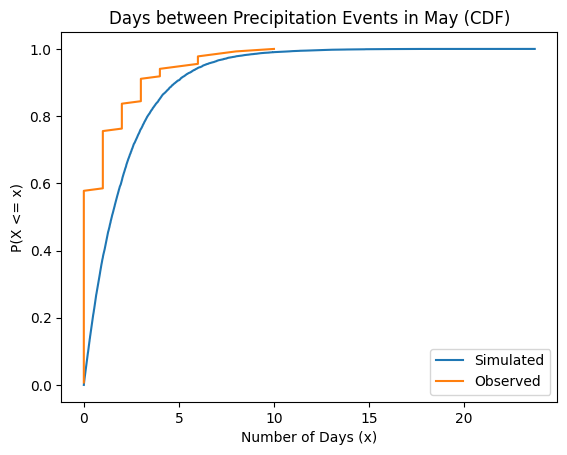

In [1665]:
# ECDF from samples 
exp_x, exp_y = ecdf(exp_samples)
plt.plot(exp_x, exp_y)

# ECDF from observations 
exp_x_obs, exp_y_obs = ecdf(exp_event_times)
plt.plot(exp_x_obs, exp_y_obs)

plt.title("Days between Precipitation Events in May (CDF)")
plt.xlabel("Number of Days (x)")
plt.ylabel("P(X <= x)")
plt.legend(labels = ["Simulated", "Observed"])
plt.show()

The observed <b><i>exp_event_times</i></b> data is not a smooth curve as in the generated <b><i>exp_samples</i></b> data. This is becaause it contains a finite set of observations in which every theoretically possible value may not be observed. 

Next let's plot the PDF of the observed sample <b><i>exp_event_times</i></b> versus that of a generated sample <b><i>exp_samples</i></b>. For simplicity, we'll reuse the sorted versions of these (<b><i>exp_x_obs</i></b> and <b><i>exp_x</i></b>) returned by the <b>ecdf</b> function. The pdf plot will be generated using SciPy Stat's <b>expon.pdf</b> function. 

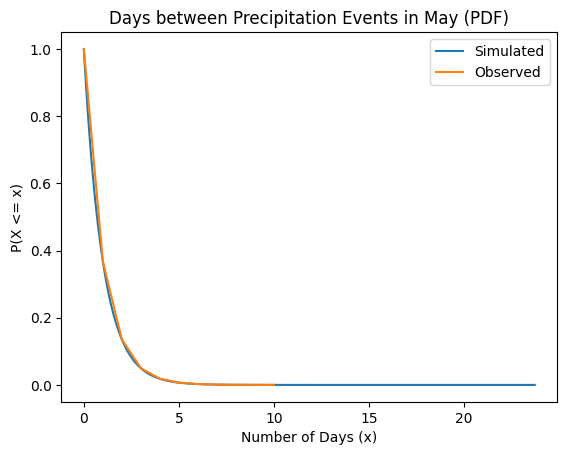

In [1666]:
plt.plot(exp_x, expon.pdf(exp_x))
plt.plot(exp_x_obs, expon.pdf(exp_x_obs))
plt.title("Days between Precipitation Events in May (PDF)")
plt.xlabel("Number of Days (x)")
plt.ylabel("P(X <= x)")
plt.legend(labels = ["Simulated", "Observed"])

plt.show()

As in the ECDF example above, the PDFs of the observed and simulated values are very similar. However, as in the case of the CDF the observed values do not capture all the theoretically possible number of days in between two precipiation events. 

<h4><u> Using the Exponential Distribution</u></h4>

Let's use the exponential distribution to answer questions about the time between two precipitation events in May. Recall that the unit of time is days. The function <b>expCDF</b> can be used to compute the CDF for a unit of time between precipitation events when given the number of days and the rate. Recall that the rate has already been calculated above as <b><i>exp_rate</i></b>. 

In [1667]:
# Calculate Exponential Distribution CDF for value of time and rate 
def expCDF(x, rate):
    e = math.exp(1)
    f_x = 1 - (e**(-rate * x))
    return f_x

<b><i>Question:</i></b> What is the probability that it will take between 5 to 7 days for a precipitation event to occur?

In [1668]:
# Probability of it taking 7 or less days to occur 
seven_days = expCDF(7, exp_rate)
five_days = expCDF(5, exp_rate)

five_to_seven = seven_days - five_days
print(five_to_seven)

0.058216050713175704


<b><i>Question:</i></b> What is the probability that it will take fewer than 3 days for a precipitation event to occur? 

In [1669]:
# Calculate the probability it takes 2 or less days
three_or_less = expCDF(3, exp_rate)
print(three_or_less)

0.7555152026523597


In the above sections you've seen how to use the Poisson and Exponential distributions with the Drake Field precipitation data. Both the Poisson and Exponential distributions required you to supply the parameters of the distributions. What if you wanted to use a non-parametric way to analyze the Drake Field distribution data?  

The next section will cover how to use non-parametric methods with the Drake Field preciptation data. 

<h4><u>May Precipitation Amounts</u></h4>

Previously we looked at the daily precipitation for May at Drake Field as the number of days in May with a precipiation event (Poisson distribution) and the rate of time between two consecutive precipitation events (Exponential distribution). Now let's look at the amount of precipitation that occured during each day in May. 

<h4><u>Descriptive Statistics</u></h4>

The Code Cell below calculates the descriptive statistics for daily precipitation in May at Drake Field. 

In [1670]:
may["DailyPrecipitation"].describe()

count    279.00000
mean       0.22595
std        0.45434
min        0.00000
25%        0.00000
50%        0.00000
75%        0.24000
max        2.28000
Name: DailyPrecipitation, dtype: float64

<h4><u>Plotting Daily Precipitation</u></h4>

Let's create a scatterplot to look at the precipitation amounts. 

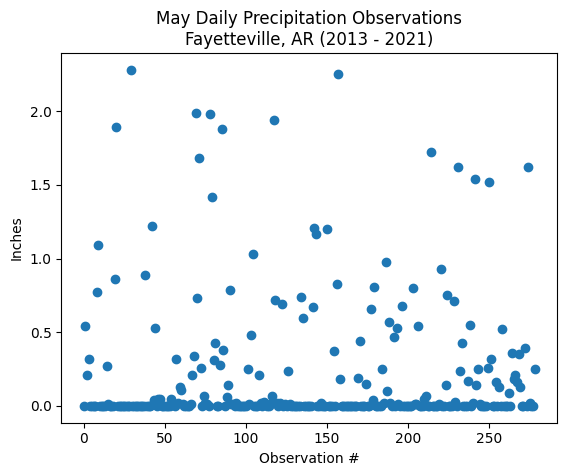

In [1671]:
# Plot observations 
plt.plot(may["DailyPrecipitation"], "o")
plt.title("May Daily Precipitation Observations\nFayetteville, AR (2013 - 2021)")
plt.xlabel("Observation #")
plt.ylabel("Inches")
plt.show()

From the scatterplots we can see that the majority of days appear to have no precipitation or only a very small amount. Let's take another look using a boxplot. 

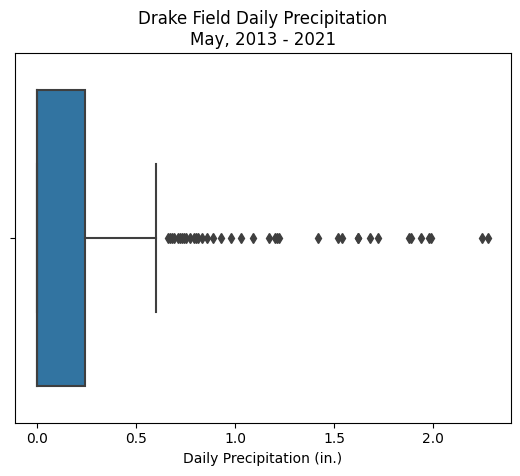

0.24


In [1672]:
box_plot = sns.boxplot(x = "DailyPrecipitation", data = may)
bp_ax = box_plot.axes
bp_ax.set_title("Drake Field Daily Precipitation\nMay, 2013 - 2021")
bp_ax.set_xlabel("Daily Precipitation (in.)")
plt.show()

#print(iqr(may["DailyPrecipitation"], rng = (0,10)))
print(np.quantile(may["DailyPrecipitation"], .75))

From the boxplot, we can see that the majority of the daily observations still appear to have none to very little precipitation, however there are a number of outliers as indicated on the boxplot. 

Based on the number of daily precipitation observations for May we could probably model it with a Normal distribution. The goal of this section is to use a non-parametric approach however, so let's use bootstrapping with the daily precipitation data. 

<h4><u>Daily Precipitation Data and Bootstrapping</u></h4>

Let's create bootstrap samples based on the process in DataCamp's "Introduction to Statistical Thinking (Part 2)". In the code cell below, either create your own function from scratch or base your function on the ones from DataCamp to generate a bootstrap sample. 

In [1673]:
def bootStrapSample(data): 
    a_sample = np.random.choice(data, len(data))
    return a_sample

In [1674]:
# Compute one bootstrap sample 
one_sample = bootStrapSample(may["DailyPrecipitation"].to_numpy())

Now that we have a bootstrap sample from the observed data we can calculate the bootstrap replicate from it. 
The bootstrap replicate for the May daily precipitation will be the mean value. In the observed sample data, the sample mean is .22595 or about .23 inches. In the Code Cell below, let's calculate the bootstrap replicate for <b><i>one_sample</i></b>. 

In [1675]:
# Calculate the bootstrap replicate
print(one_sample.mean())

0.24114695340501793


We need to generate more than a single bootstrap sample and replicate though. In the code cell below either base your function  on those from DataCamp's "Introduction to Statistical Thinking (Part 2)" or create your own from scratch to generate a given number bootstrap samples and return them. 

In [1676]:
def multipleSamples(n, data): 
    # Create empty numpy array the size of n 
    samples = []
    
    for i in range(n):
        samples.append(bootStrapSample(data))
    
    return samples

Now let's generate 10,000 bootstrap samples using the function above. 

In [1677]:
# Generate 10,000 bootstrap samples 
precip_10k = multipleSamples(10000, may["DailyPrecipitation"])

Since our replicate of interest is the mean, we'll need to generate it for each of the bootstrap samples. This could be done like in the function from DataCamp or like in the Code Cell below. 

In [1678]:
# Calculate the replicate (mean) for the 10k bootstrap samples 
mean_replicates = [x.mean() for x in precip_10k]

<h4><u>Histogram of Replicates</u></h4>

Let's visualize the mean replicates of May's daily precipitation as a histogram using Seaborn's <b>displot</b> function. We'll let <b>displot</b> determine the number of bins automatically, specify the <b><i>kind</i></b> of plot as a histogram, and set the <b><i>stat</i></b> to probability to achieve an approximate PDF of the bootstrap replicates. 

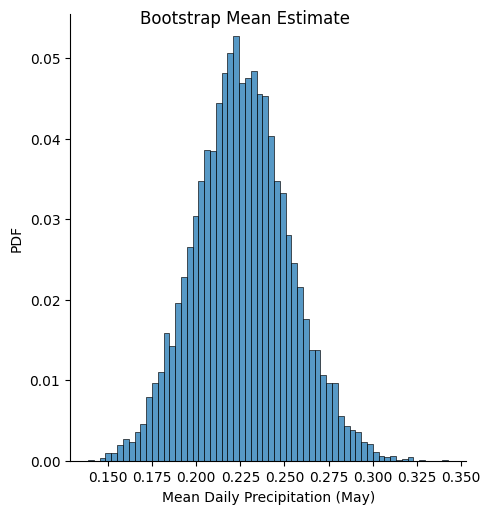

In [1679]:
# Create a PDF of the bootstrap replicates 
mean_rep_pdf = sns.displot(x = mean_replicates, kind = "hist", stat = "probability")

# Set the Figure title 
mean_rep_pdf.fig.suptitle("Bootstrap Mean Estimate")

# Access axes object to customize 
axs = mean_rep_pdf.axes
axs[0][0].set_xlabel("Mean Daily Precipitation (May)")
axs[0][0].set_ylabel("PDF")

plt.show()

<h4><u>Calculating Confidence Intervals </u></h4>

Next let's calculate the 95% Confidence Interval for the mean daily precipitation from the bootstrap replicates stored in <b><i>mean_replicates</i></b> based on the method used in DataCamp which is NumPy's <b>percentile</b> function. 

<p style = "font-size:8px">Additional Sources outside of DataCamp for Confidence Intervals</p>
<ol style = "font-size:8px">
    <li>Tan & Tan. 2010. "The Correct Interpretation of Confidence Intervals". Proceedings of Singapore Healthcare 19:3. pp. 276 - 278. https://journals.sagepub.com/doi/pdf/10.1177/201010581001900316 . </li>
    <li>Penn State.2021. "Interpreting Confidence Intervals". STAT 200. https://online.stat.psu.edu/stat200/lesson/4/4.2/4.2.1 . </li>
</ol>

In [1680]:
# Calculate the 95% CI
mean_rep_95_ci = np.percentile(mean_replicates, [2.5, 97.5])

print(mean_rep_95_ci)

[0.17480197 0.28057796]


The 95% CI calculated above can be interpreted a follows: The true population mean lies between .17523208 and .28043011 with 95% confidence. This also means that the 95% CI will contain the true population mean 95% of the time. 

<h4><u>Hypothesis Testing</u></h4>

In this section we'll look at how to set up a hypothesis test based on simulated data as in DataCamp's Part 2 Chapter 3. In this section, let's say that another weather station was set up to the east of Drake Field at Lake Wilson park and that it took measurements of daily precipitation during May also. (Note: There's not really another weather station at Lake Wilson). However, in this Case Study we don't have access to the raw data of the Lake Wilson station and only have the mean daily precipitation which is .2367 in. 

First let's set up the null hypothesis for this situation. The null hypothesis is: 
<br><b><i>There is no difference between the true May mean daily precipitation values of Drake Field and Lake Wilson</i></b>.  

The alternative hypotheisis is: 
<br><b><i>There is a difference between the true May mean daily precipitation values of Drake Field and Lake Wilson</i></b>


<h4><u>Shifting May Daily Precipitation Data</u></h4>

Now that the null and alternative hypotheses are set up we can proceed to the next step of shifting the <b><i>may</i></b> <i>DailyPrecipitation</i> data by the mean of the Lake Wilson data. 

In [1681]:
# Shift the May precipitation data
may_shifted = may["DailyPrecipitation"] - np.mean(may["DailyPrecipitation"]) + .2367

# See the first few values
may_shifted.head()

0    0.01075
1    0.55075
2    0.22075
3    0.33075
4    0.01075
Name: DailyPrecipitation, dtype: float64

<h4><u>Bootstrapping Shifted Daily Precipitation Data</u></h4>

The next step is to create the bootstrapped sample using the Lake Wilson mean value. 10,000 bootstrapped samples will be generated. 

In [1682]:
# Create the bootstrapped sample 
lake_wilson = multipleSamples(10000, may_shifted)

# Calculate the mean replicate of the bootstrapped samples 
lake_wilson_rep = [np.mean(x) for x in lake_wilson]

<h4><u>Calculating the p-value</u></h4>

Now that the bootstrap replicates have been calculated for Lake Wilson, we can see how many of those mean replicates are less than the observed mean of <b><i>may["DailyPrecipitation"]</i></b> as a fraction of the total number of replicates. 

In addition to setting up the hypotheses, the threshold of the p-value at which to accept or reject the null hypothesis needs to be determined . Let's set this to .05. If the calculated p-value is greater than .05 there is not a statistically significant difference between the two daily precipitation means. If the calculated p-value is less than .05 there is a statistically significant difference between the two daily precipitation means. 


In [1683]:
# Calculate the mean daily precipitation in May for Drake Field 
may_mean = np.mean(may["DailyPrecipitation"])

#Compute the number of bootstrap replicates that are less than the observed mean and divide by total number of replicates 
p_val = np.sum((np.asarray(lake_wilson_rep) <= may_mean)) / len(lake_wilson_rep)

# Print the p_val
print(p_val)

0.345


The calculated p-value is .3598 which is greater than .05. This means that the null hypothesis should be accepted. There is no statistically significant difference between the average May daily precipitation data between the two weather stations. 

<h3 class="yt">Your Turn</h3>

In this Your Turn you will use the <i>Sheffield Weather Station</i> data from DataCamp's Statistical Thinking in Python (Part 2). The <i>Sheffield Weather Station</i> data is located on the bottom right of the course's main page under Datasets. 



<h3 class="yt">Your Turn - 1</h3>

Access the Sheffield Weather Station data on DataCamp and read it into a format suitable for data analysis. Extract into a DataFrame all rows that occur for the <b><i>month of March</i></b>. 

In [1684]:
# Your Turn - 1

weather_df = pd.read_csv("Data/sheffield_weather_station.csv", sep=" ", skiprows=8, skipinitialspace=True)
weather_df = weather_df[weather_df["mm"] == 3]

<h3 class="yt">Your Turn - 2</h3>

You are interested in the <b><i>number of years in a 10 year period that March experiences a rainfall of greater than 70mm</i></b> at Sheffield. For a 10 year time period, calculate the average number times March exceeds 70mm of rainfall and print it. 

In [1685]:
# Your Turn - 2

n_rainy_marches = weather_df["rain"].rolling(window=10).apply(lambda x: sum(x > 70))
mu = n_rainy_marches.mean()
print(mu)

3.192


<h3 class="yt">Your Turn - 3</h3>

The number of times March rainfall exceeds 70mm in a 10 year time period can be modeled as a Poisson process. Use the average you calculated in <span class = "yt">Your Turn 2</span> as the parameter lambda. Answer the following questions: 

<b><i>Question 1:</i></b>For a 10 year time period, what is the probability that exactly 6 Marches have a rainfall exceeding 70mm? 

<b><i>Question 2:</i></b>For a 10 year time period, what is the probability that at most 3 Marches will experience 70mm or more rainfall? 

<b><i>Question 3:</i></b>For a 10 year time period, what is the probability that at least 2 Marches will experience 70mm or more?



In [1686]:
# Your Turn - 3

print(poisson.pmf(6, mu))
print(poisson.cdf(3, mu))
print(1 - poisson.cdf(1, mu))

0.06036383362141745
0.6043010920039146
0.8277523570344235


<h3 class="yt">Your Turn - 4</h3>

Create two different plots showing March rainfall amounts in Sheffield. One plot needs to be the ECDF of the rainfall data. The other can be of your choosing. 

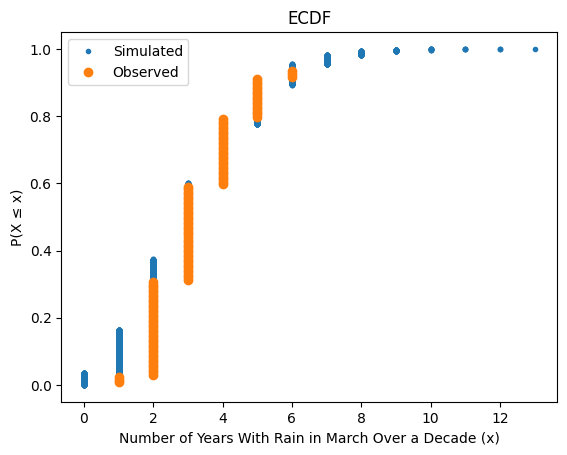

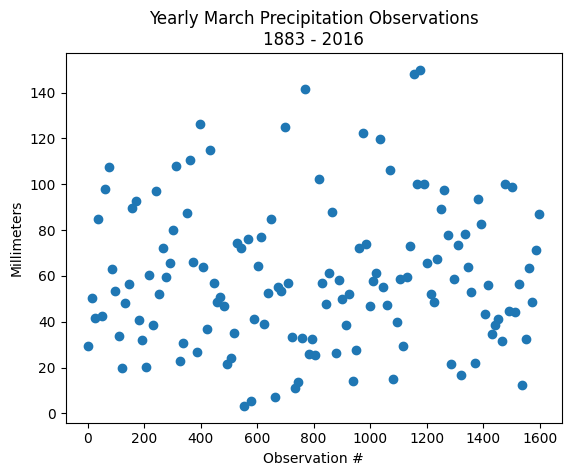

In [1687]:
# Your Turn - 4

# Sample poisson distribution
poisson_samples = np.random.poisson(mu, 10000)

x_sample, y_sample = ecdf(poisson_samples)
x_observed, y_observed = ecdf(n_rainy_marches)

# ECDF
plt.plot(x_sample, y_sample, marker='.', linestyle='none')
plt.plot(x_observed, y_observed, marker = "o", linestyle = "none")
plt.title("ECDF")
plt.xlabel("Number of Years With Rain in March Over a Decade (x)")
plt.ylabel("P(X ≤ x)")
plt.legend(labels=["Simulated", "Observed"])
plt.show()

# Plot observations
plt.plot(weather_df["rain"], "o")
plt.title("Yearly March Precipitation Observations\n1883 - 2016")
plt.xlabel("Observation #")
plt.ylabel("Millimeters")

plt.show()

<h3 class="yt">Your Turn - 5</h3>
Generate 10,000 bootstrap replicates from the Sheffield March rain data. Using these, calculate the 95% CI of the mean. 

In [1688]:
# Your Turn - 5

# Generate 10,000 bootstrap samples
precip_10k = multipleSamples(10000, weather_df["rain"])

# Calculate the replicate (mean) for the 10k bootstrap samples
mean_replicates = [x.mean() for x in precip_10k]

# Calculate the 95% CI
mean_rep_95_ci = np.percentile(mean_replicates, [2.5, 97.5])

print(mean_rep_95_ci)

[54.06031716 64.54427239]


<h3 class="yt">Your Turn - 6</h3>

You are interested in seeing if the average March rainfall at the Sheffield weather station is different from the average March rainfall at a weather station approximately 50 miles away. You do not have the data for this weather station only the average <b><i>March rainfall amount of 66.43mm</i></b>. 

Conduct a hypothesis test to check if there is any difference between the average March rainfall data between the two weather stations. Make sure to state your null and alternative hypotheses, the p-value at which you will accept or reject the null hypothesis, conduct the necessary steps to test the hypothesis, and state your conclusion once complete. 


$$H_0: \mu=66.43$$
$$H_A: \mu\ne66.43$$

In [1689]:
# Shift the March precipitation data
march_shifted = weather_df["rain"] - weather_df["rain"].mean() + 66.43

# Create the bootstrapped sample
other_station = multipleSamples(10000, march_shifted)

# Calculate the mean replicate of the bootstrapped samples
other_station_rep = [np.mean(x) for x in other_station]

# Calculate the mean yearly precipitation in March for Sheffield
march_mean = weather_df["rain"].mean()

# Compute the number of bootstrap replicates that are less than the observed mean and divide by total number of replicates
p_val = np.sum((np.asarray(other_station_rep) <= march_mean)) / len(other_station_rep)

# Print the p_val
print(p_val)

0.0033


> The calculated p-value is .0033 which is less than .05. This means that the null hypothesis should be rejected. There is a statistically significant difference between the average yearly March precipitation data between the two weather stations.

